### Imports

In [227]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from ipywidgets import interact, fixed
import warnings
from tqdm import tqdm
from collections import defaultdict

In [158]:
warnings.filterwarnings('ignore')

### Constants

In [243]:
TRENDS_PATH = "/mlodata1/prakhar/twitter_covid_insights/insights_All/trends.pkl"
TOPICS_PATH = "/mlodata1/prakhar/twitter_covid_insights/insights_All/topics.pkl"
TWEETS_PIPED_PATH = "/mlodata1/prakhar/all_available_tweets_piped"
CLUSTERED_TWEETS_PATH = "/mlodata1/raileanu/clustered_sampled_tweets"

###  Most common topics

In [160]:
def most_common_topics_per_day(trends, dates, topic_labels, day, n=50):
    day_counts = {k: v[day] for k, v in trends.items()}
    day_counts = dict(sorted(day_counts.items(), key=lambda item: item[1], reverse=True))
    day_counts = {topic_labels[int(k)]: day_counts[k] / list(day_counts.values())[0] for k in list(day_counts)[:n]}
    
    fig, ax = plt.subplots(1, 1)
    ax.set_xticklabels(list(day_counts.keys()), rotation=45, ha='right')
    sns.barplot(x=list(day_counts.keys()), y=list(day_counts.values()), palette="rocket", ax=ax)
    ax.set_xlabel('Topic')
    ax.set_ylabel(f'Frequency')
    ax.set_title(dates[day])

In [161]:
def get_dates():
    file_names = os.listdir(TWEETS_PIPED_PATH)
    return [name.replace('parsed_', '').replace('.parquet', '') for name in file_names]

In [162]:
trends = pkl.load(open(TRENDS_PATH, 'rb'))[0]
trends = {k: v for k, v in trends.items() if not k.startswith('Pos') and not k.startswith('Neg')}
topics = pkl.load(open(TOPICS_PATH, 'rb'))[0]
topic_labels = {k: v[0] for k, v in topics.items()}
dates = get_dates()

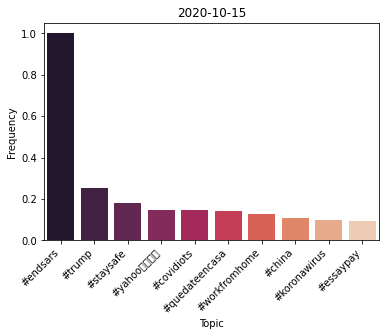

In [163]:
most_common_topics_per_day(trends, dates, topic_labels, 350, n=10)

In [164]:
interact(most_common_topics_per_day, trends=fixed(trends),
         dates=fixed(dates), topic_labels=fixed(topic_labels),
         n=fixed(10), day=(92, len(dates) - 1, 1));

interactive(children=(IntSlider(value=388, description='day', max=684, min=92), Output()), _dom_classes=('widg…

### Country trends

In [238]:
analyzed_hashtags = ['#vaccine']
hashtag_topic_id = {hashtag: -1  for hashtag in analyzed_hashtags}

In [239]:
for topic_id in topics.keys():
    for hashtag in analyzed_hashtags:
        if hashtag in topics[topic_id]:
            hashtag_topic_id[hashtag] = topic_id

In [240]:
for hashtag in analyzed_hashtags:
    if hashtag_topic_id[hashtag] != -1:
        print(topics[hashtag_topic_id[hashtag]])

['#vaccine' '#covidvaccine' '#vaccines' '#vaccinated' '#covid19vaccine'
 '#moderna' '#vaccinations' '#pfizervaccine' '#covidvaccines'
 '#pfizerbiontech' '#johnsonandjohnson' '#covid19vaccines'
 '#modernavaccine' '#astrazenecavaccine' '#boostershots'
 '#oxfordastrazeneca' '#vaccinehesitancy' '#pfizercovidvaccine'
 '#johnsonandjohnsonvaccine' '#boostershot' '#phizer']


In [241]:
counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

In [244]:
for file in tqdm(os.listdir(CLUSTERED_TWEETS_PATH)):
    piped_tweets = pd.read_parquet(os.path.join(TWEETS_PIPED_PATH, file))
    piped_tweets['tokenized_hashtags'] = piped_tweets['hashtags'].apply(lambda x: x.split(','))
    country_hashtags = piped_tweets.groupby('country_code', as_index=False)['tokenized_hashtags'].agg(sum)
    country_hashtags['tokenized_hashtags'] = country_hashtags['tokenized_hashtags'].apply(lambda x: [elem for elem in x if elem != ''])
    date = file.replace('parsed_', '').replace('.parquet', '')
    for index, row in country_hashtags.iterrows():
        country = row['country_code']
        tokenized_hashtags = row['tokenized_hashtags']
        for hashtag in analyzed_hashtags:
            counts[hashtag][country][date] += tokenized_hashtags.count(hashtag)

  4%|▍         | 22/547 [00:34<13:48,  1.58s/it]


KeyboardInterrupt: 

In [236]:
counts

defaultdict(<function __main__.<lambda>()>,
            {'#vaccine': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'AU': defaultdict(int,
                                      {'2019-10-01': 0,
                                       '2019-10-03': 0,
                                       '2019-10-04': 0,
                                       '2019-10-06': 0,
                                       '2019-10-08': 0,
                                       '2019-10-09': 0,
                                       '2019-10-10': 0,
                                       '2019-10-11': 0,
                                       '2019-10-12': 0,
                                       '2019-10-13': 0,
                                       '2019-10-14': 0,
                                       '2019-10-15': 0,
                                       '2019-10-16': 0,
                                       '2019-10-17': 0,
                                    